In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data=pd.read_csv(r"D:\machine_learning\data\big_mart_sale_cleaned.csv")
data.shape

(8523, 46)

In [49]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [50]:
data.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

In [51]:
data_x=data.drop(["Item_Outlet_Sales"],axis=1)
data_y=data["Item_Outlet_Sales"]

## train and test data

In [52]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,random_state=56)

## Imlplementing linear regression

In [53]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [54]:
#creating instance of linear regression
lr=LR()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#predicting over train set and calculating mae
train_predict=lr.predict(train_x)
e1=mae(train_predict,train_y)
print("Mean absolute error of train data ",e1)

Mean absolute error of train data  821.4206146753687


In [56]:
#predicting over test data
test_predict=lr.predict(test_x)
e2=mae(test_predict,test_y)
print("Mean absolute error of test data ",e2)

Mean absolute error of test data  875.2688982985251


### Parameters of regression

In [57]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

Text(0.5, 1.0, 'Coefficients plot')

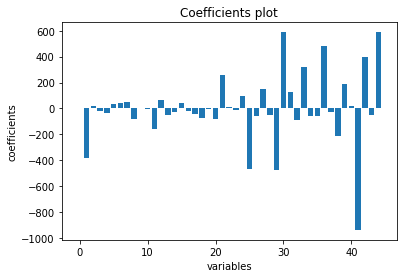

In [58]:
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficients")
plt.title("Coefficients plot")

In [59]:
#Arranging and predicting residuals
residuals=pd.DataFrame({"fitted_values":test_y,"predicted_values":test_predict})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


### Plotting residulas

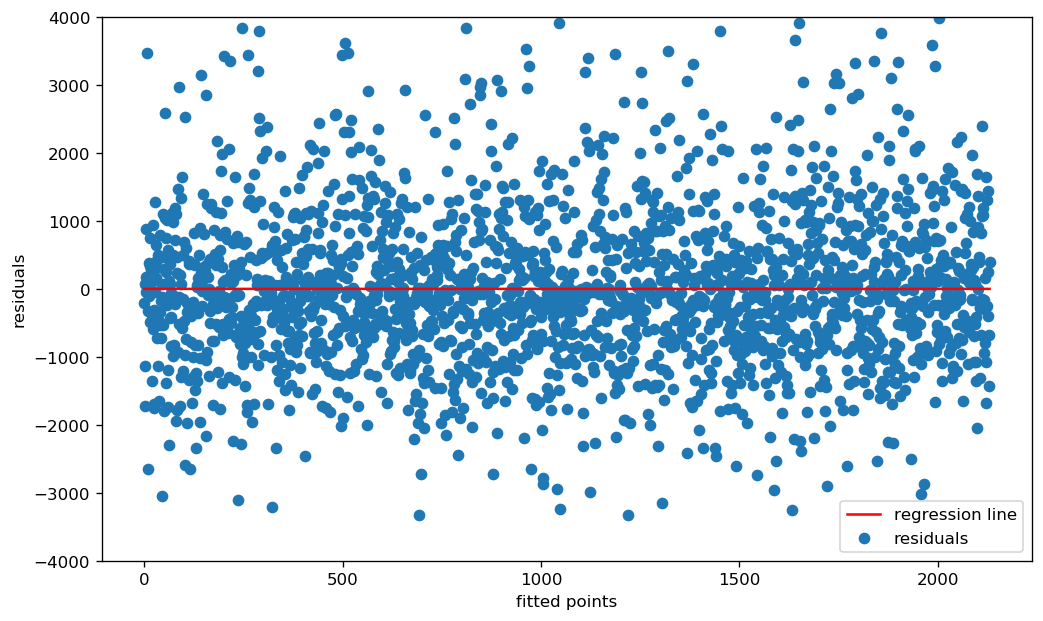

In [60]:
f=range(0,residuals.shape[0])
k=[0]*residuals.shape[0]
plt.figure(figsize=(10,6),dpi=120,facecolor="w",edgecolor="b")
plt.ylim(-4000,4000)
plt.scatter(f,residuals["residuals"],label="residuals")
plt.plot(f,k,color="red",label="regression line")
plt.xlabel("fitted points")
plt.ylabel("residuals")
plt.legend()

Text(0.5, 1.0, 'Distribution of Error terms')

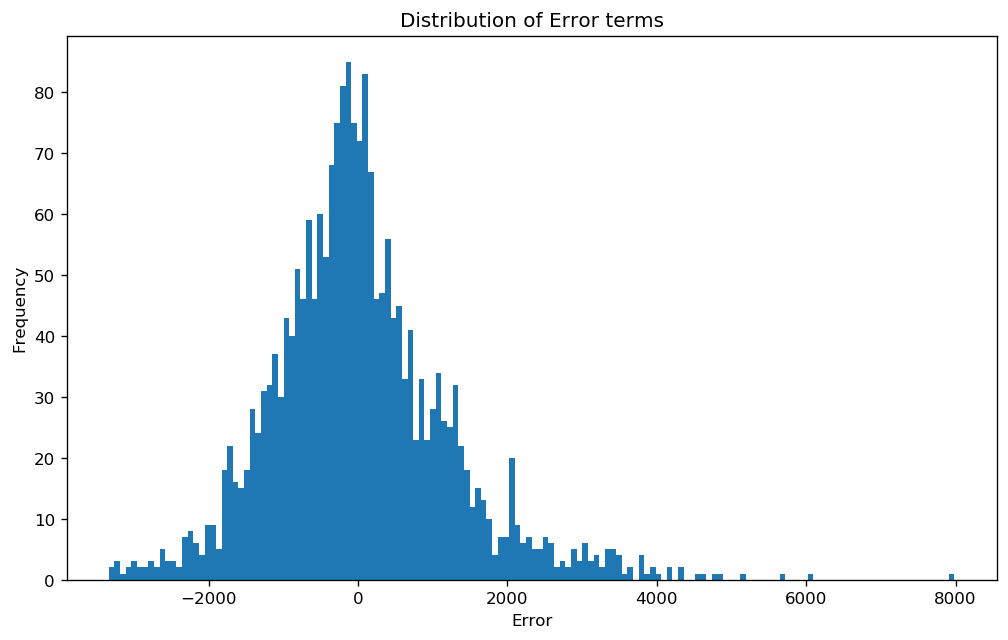

In [61]:
#histogram of residuals
plt.figure(figsize=(10,6),dpi=120)
plt.hist(residuals["residuals"],bins=150)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of Error terms")

## Model Interpretability

In [62]:
lr=LR(normalize=True)
lr.fit(train_x,train_y)
test_predict=lr.predict(test_x)
error=mae(test_predict,test_y)
print("Error after normalisation in test data ",error)

Error after normalisation in test data  871.6221818864383


Text(0.5, 1.0, 'Noramalised Cofficient plot')

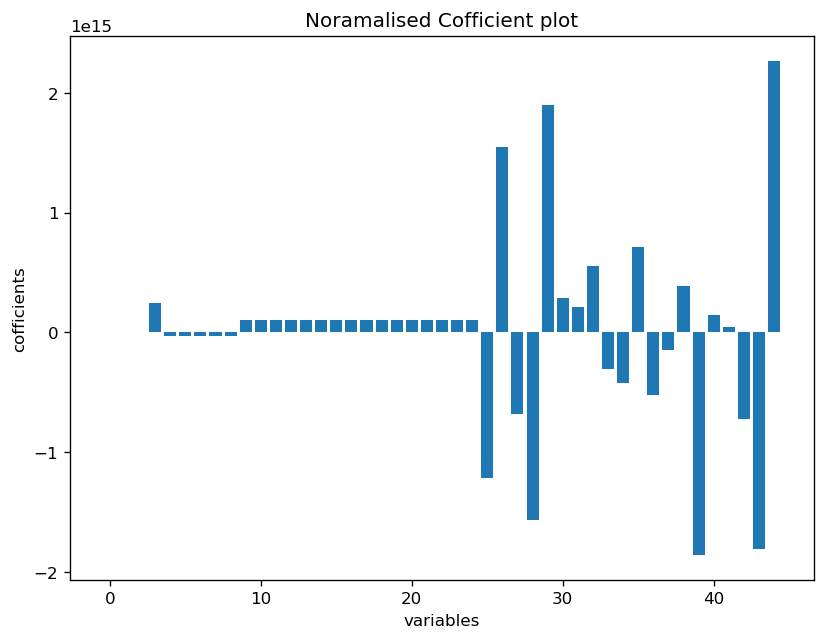

In [63]:
plt.figure(figsize=(8,6),dpi=120,facecolor="w",edgecolor="r")
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("cofficients")
plt.title("Noramalised Cofficient plot")

Text(0.5, 1.0, 'Noramalised Cofficient plot')

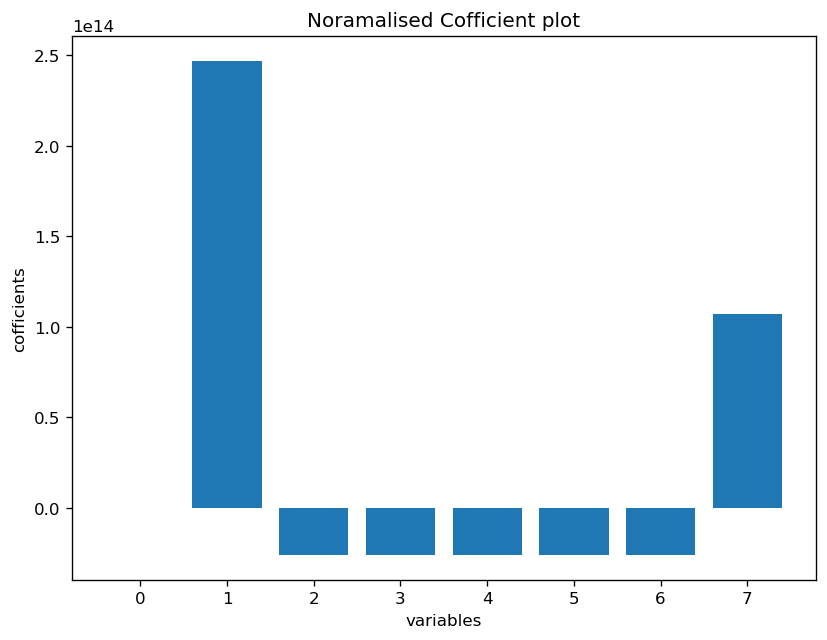

In [64]:
plt.figure(figsize=(8,6),dpi=120,facecolor="w",edgecolor="r")
x=range(len(train_x.columns[2:10]))
y=lr.coef_[2:10]
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("cofficients")
plt.title("Noramalised Cofficient plot")

#### There are lot of parameters that are not important from the graph

In [66]:
cofficients=pd.DataFrame({"Variable":x.columns,"cofficients":lr.coef_})
cofficients.head(),cofficients.shape

(                    Variable   cofficients
 0                Item_Weight  1.819881e-01
 1            Item_Visibility -3.787202e+02
 2                   Item_MRP  1.549637e+01
 3  Outlet_Establishment_Year  2.468269e+14
 4        Item_Fat_Content_LF -2.606298e+13,
 (45, 2))

In [67]:
"{:e}".format(min(cofficients["cofficients"])),"{:e}".format(max((cofficients["cofficients"])))

('-1.855580e+15', '2.265827e+15')

In [120]:
sign_var=cofficients[(cofficients.cofficients>0.5)]
sign_var.shape

(28, 2)

#### Extracting the desired data

In [123]:
subset=data[sign_var["Variable"].values]
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Size_High,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,48.2692,2009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,141.6180,1999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,182.0950,1998,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,53.8614,1987,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [126]:
x=data.drop("Item_Outlet_Sales",axis=1)
y=data["Item_Outlet_Sales"]

In [127]:
#training the desired data
train_x1,test_x1,train_y1,test_y1=train_test_split(subset,y,random_state=56)

In [128]:
lr1=LR(normalize=True)
lr1.fit(train_x1,train_y1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Text(0.5, 1.0, 'Cofficient plot')

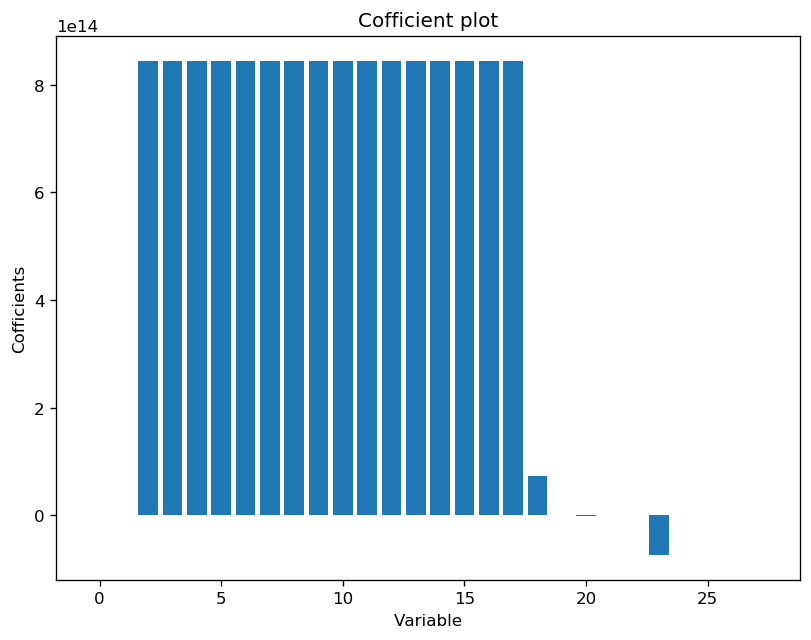

In [132]:
#plotting the cofficients
plt.figure(figsize=(8,6),dpi=120)
x=range(len(train_x1.columns))
y=lr1.coef_
plt.bar(x,y)
plt.xlabel("Variable")
plt.ylabel("Cofficients")
plt.title("Cofficient plot")